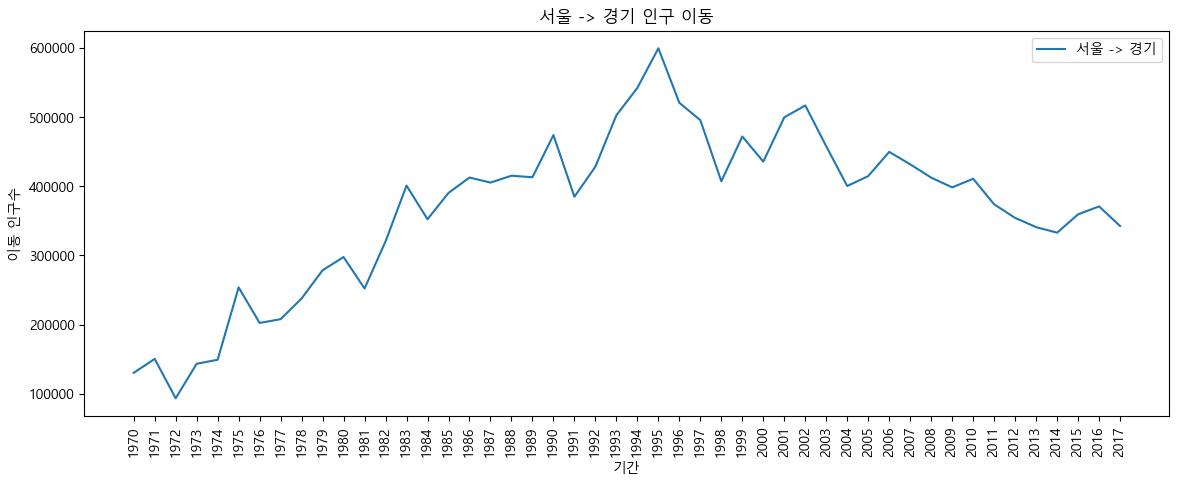

In [16]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

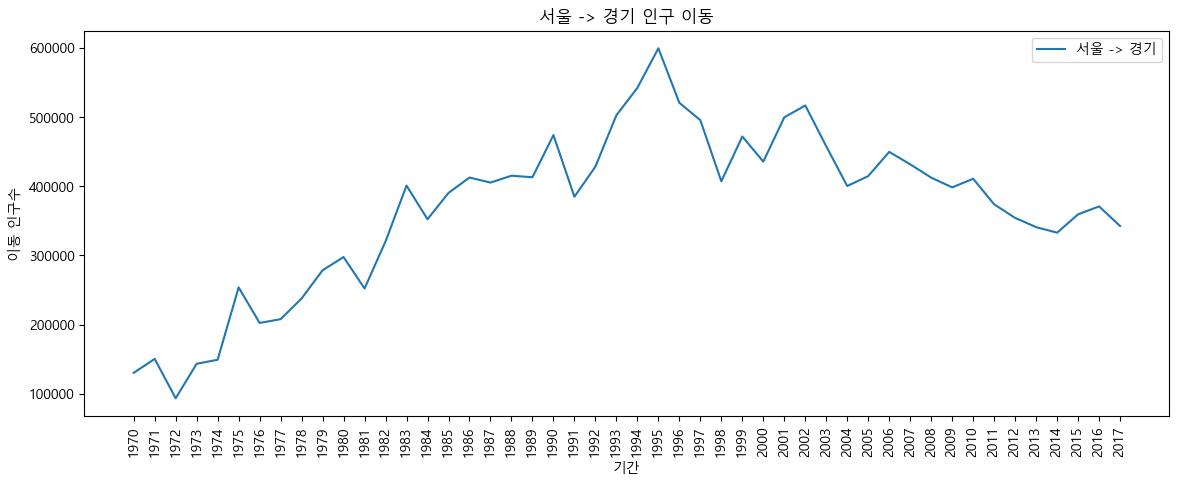

In [17]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [18]:
# 경기 -> 서울
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
# 1. head() 대략적으로 데이터를 확인
# 2. 데이터의 정보 확인 info(), describe()
# 3. 결측치 여부 확인
# 결측치가 확인되면 drop fillna  선택
#결측치 모두 있는지 확인 하기 위해 .value_counts한거임
# df['전출지별'].value_counts()
df['전출지별']= df['전출지별'].ffill() #결측치 대처, 문자열이고 병합된 칼럼의 정보가 na로 표기되어서 앞의 문자열로 대처
# df.info()
df.isna().sum().values.sum()
pd.to_numeric(df.loc[1:,'1970'],errors='coerce') # 문자형 숫자=> 숫자형 변경했는데, 변경불가능한 데이터는 결측치로 대처

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [19]:
mask = (df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]

In [20]:
df2.isna().sum().values.sum() #결측치 없음
df3 = df2.iloc[:,2:]
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


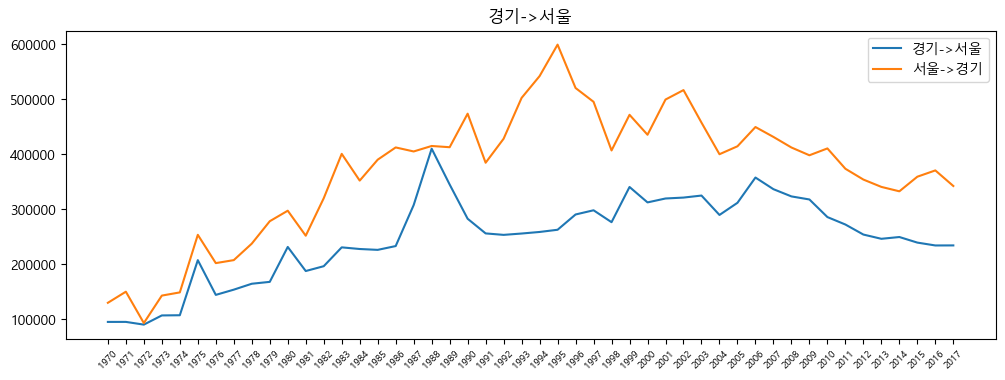

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기->서울")

plt.plot(df3.columns, df3.values.flatten()) #경기-> 서울
plt.plot(sr_one.index, sr_one.values) #서울-> 경기

plt.legend(['경기->서울', '서울->경기'],loc = 'best')
plt.xticks(rotation=45,fontsize = 7)
plt.show()

In [22]:
# 1991~ 1995 데이터 추출해서 gpt를 통해 인구이동에 대한 추론
print(df3.loc[:,'1991':'1995'])

sr_one['1991':'1995']

       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893


1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
Name: 경기도, dtype: object

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기->서울")

plt.plot(df3.columns, df3.values.flatten()) #경기-> 서울
plt.plot(sr_one.index, sr_one.values) #서울-> 경기

plt.xlim('19991','1995')

plt.legend(['경기->서울', '서울->경기'],loc = 'best')

plt.xticks(rotation=45,fontsize = 7)
plt.show()